Accuracy: 0.9735

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.99      0.97      0.98       202

    accuracy                           0.97       264
   macro avg       0.95      0.98      0.96       264
weighted avg       0.98      0.97      0.97       264



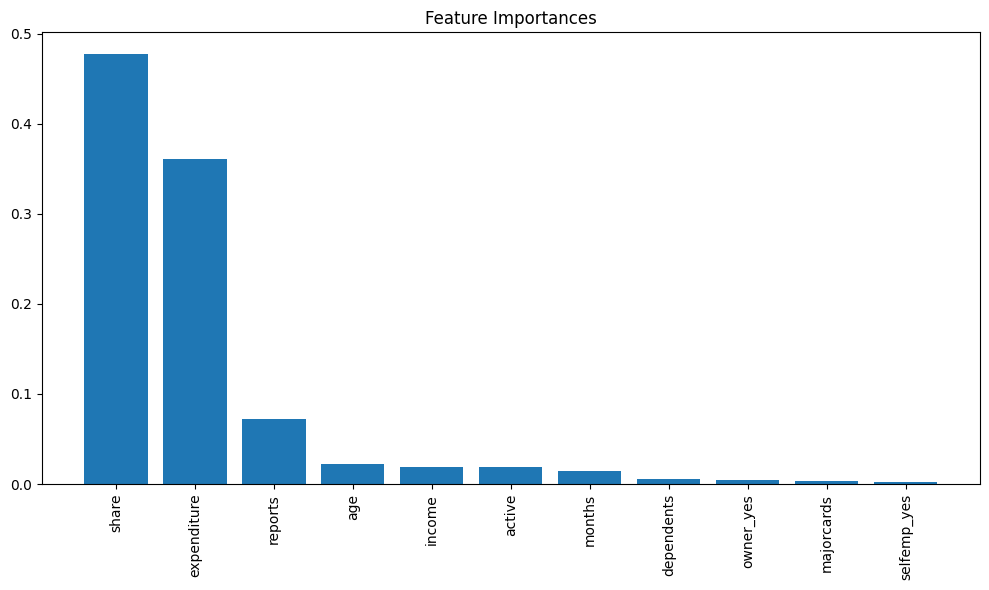

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv('AER_credit_card_data.csv')
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('card', axis=1)
y = df_encoded['card']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", report)
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
